In [1]:
%matplotlib inline

In [20]:
import sys, os
import numpy as np
import random
from math import exp
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML , Image
#http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

In [21]:
def calc_total_energy(J):
    global ising_array
    energy = 0
    for i in range(n):
        for j in range(n):
            energy += -J*ising_array[i][(j+1)%n] - J*ising_array[(i+1)%n][j] + H*ising_array[i][j]
    return energy

In [22]:
def calc_del_e(spin, J):
    global ising_array
    i = spin[0]
    j = spin[1]
    neigh = [ising_array[(i+1)%n][j], ising_array[i][(j+1)%n], ising_array[(i-1)%n][j], ising_array[i][(j-1)%n]]
    #when ising array is a numpy array neigh = ising_array[[(i+1)%n,i,(i-1)%n,i],[j,(j+1)%n,j,(j-1)%n]]
    sigma_spin = ising_array[i][j]
    old_e = -J*sum([sigma_spin*i for i in neigh]) + H*sigma_spin
    new_e = -J*sum([-sigma_spin*i for i in neigh]) - H*sigma_spin
    return (new_e - old_e)

In [23]:
def sweep():
    global tot_en
    for sw in range(n*n):
        spin = [random.randint(0,n-1),random.randint(0,n-1)]
        del_e = calc_del_e(spin, J)
        if(exp(-beta*del_e) > random.random()):
            ising_array[spin[0]][spin[1]] *= -1
            tot_en += del_e
    return ising_array

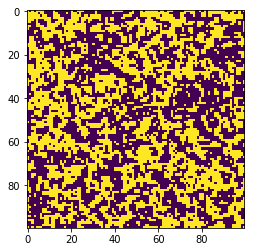

In [24]:
n=100
ising_array = [[-1 if (random.random() > 0.5) else 1  for i in range(n)] for j in range(n)]
J = 1
H = 0.0
beta = 1
fig = plt.figure()

tot_en = calc_total_energy(J)

im = plt.imshow(sweep(), animated=True)

random.seed(1002)
sweeps = 10

def animate(i):
    im.set_array(sweep())
    return im,

#plt.cla()
#plt.imshow(ising_array)
#plt.show()

In [25]:
#writer = ImageMagickFileWriter()
#rc('animation', html='html5')
#plt.rcParams['animation.writer'] = 'imagemagick'
anim = animation.FuncAnimation(fig, animate, interval=50, blit=True)
#anim = animation.FuncAnimation(fig, animate, init_func=init,
                               #frames=100, interval=20, blit=True)

In [28]:
anim.save('./animation.gif', writer='imagemagick', fps=60)

In [29]:
Image(url='./animation.gif')

In [16]:
#print(animation.writers.list())
#HTML(anim.to_html5_video())

['imagemagick', 'imagemagick_file']


In [9]:
#rc('animation', html='html5')
#anim